https://www.kaggle.com/datasets/pratyushpuri/sports-betting-predictive-analysis-dataset

## 1. Dataset Information

This comprehensive synthetic dataset contains 1,369 rows and 10 columns specifically designed for predictive modeling in sports betting analytics. The dataset provides a rich foundation for machine learning applications in the sports betting domain, featuring realistic match data across multiple sports with comprehensive betting odds, team information, and outcome predictions.

## 2. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글꺠짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("G:\내 드라이브\DArtB\Kaggle Study\Sports_Betting_Predictive_Analysis\sports_betting_predictive_analysis.csv")

In [3]:
df.head()

,Match_ID,Date,Sport,Home_Team,Away_Team,Home_Team_Odds,Away_Team_Odds,Draw_Odds,Predicted_Winner,Actual_Winner
0,M00001,2024-01-24,Basketball,Gonzalezmouth Tigers,Hernandezfurt Lions,3.62,3.99,NaN,Hernandezfurt Lions,Hernandezfurt Lions
1,M00002,2025-05-03,Basketball,Rothstad Wolves,North Manuel Eagles,1.84,NaN,NaN,Rothstad Wolves,Rothstad Wolves
2,M00003,2025-04-10,Baseball,Aliciaport Lions,West Gabrielton Lions,3.93,3.29,NaN,Aliciaport Lions,Aliciaport Lions
3,M00004,2024-08-02,Tennis,Lake Samantha Eagles,Simonshire Lions,3.70,3.61,NaN,Simonshire Lions,Lake Samantha Eagles
4,M00005,2024-10-05,Tennis,Brendanport Eagles,Williamsfurt Bears,2.26,2.52,NaN,Williamsfurt Bears,Brendanport Eagles


In [8]:
df.shape

(1369, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_ID          1369 non-null   object 
 1   Date              1369 non-null   object 
 2   Sport             1369 non-null   object 
 3   Home_Team         1369 non-null   object 
 4   Away_Team         1369 non-null   object 
 5   Home_Team_Odds    1298 non-null   float64
 6   Away_Team_Odds    1282 non-null   float64
 7   Draw_Odds         498 non-null    float64
 8   Predicted_Winner  1369 non-null   object 
 9   Actual_Winner     1369 non-null   object 
dtypes: float64(3), object(7)
memory usage: 107.1+ KB


In [5]:
df.describe()

,Home_Team_Odds,Away_Team_Odds,Draw_Odds
count,1298.000000,1282.000000,498.000000
mean,3.069823,3.060031,3.103012
std,1.096600,1.087785,1.098248
min,1.200000,1.210000,1.200000
25%,2.110000,2.130000,2.142500
50%,3.080000,2.995000,3.160000
75%,3.980000,4.017500,4.062500
max,4.980000,5.000000,4.990000


In [9]:
df.isnull().sum()

Match_ID              0
Date                  0
Sport                 0
Home_Team             0
Away_Team             0
Home_Team_Odds       71
Away_Team_Odds       87
Draw_Odds           871
Predicted_Winner      0
Actual_Winner         0
dtype: int64

In [11]:
df['Sport'].value_counts()

Sport
Basketball    292
Tennis        278
Baseball      271
Football      270
Hockey        258
Name: count, dtype: int64

In [12]:
df.columns

Index(['Match_ID', 'Date', 'Sport', 'Home_Team', 'Away_Team', 'Home_Team_Odds',
       'Away_Team_Odds', 'Draw_Odds', 'Predicted_Winner', 'Actual_Winner'],
      dtype='object')

### 2-1. EDA through visualization

C:\Users\luke\AppData\Local\Temp\ipykernel_34604\58529365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_counts.index, y=sport_counts.values, palette='viridis')


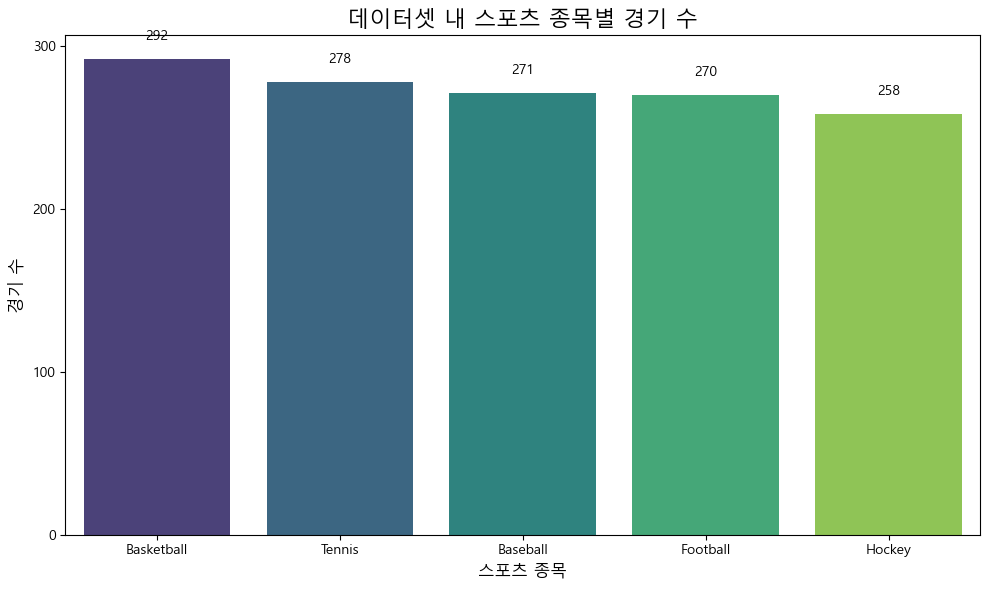

In [13]:
# df['Sport'] 컬럼의 각 고유값(스포츠 종목)의 빈도수를 계산합니다.
sport_counts = df['Sport'].value_counts()

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
sns.barplot(x=sport_counts.index, y=sport_counts.values, palette='viridis')

# 그래프 제목과 축 라벨 설정
plt.title('데이터셋 내 스포츠 종목별 경기 수', fontsize=16)
plt.xlabel('스포츠 종목', fontsize=12)
plt.ylabel('경기 수', fontsize=12)

# Y축의 값을 정수형으로 표시 (경기 수는 정수이므로)
plt.yticks(np.arange(0, max(sport_counts.values) + 100, 100)) # 0부터 최대값까지 100 단위로 눈금 설정
plt.ticklabel_format(style='plain', axis='y') # 지수 표기법 방지

# 각 막대 위에 정확한 경기 수 표시
for index, value in enumerate(sport_counts.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10) # 막대 위에 텍스트 추가

plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.show() # 그래프 표시

In [14]:
accuracy = (df['Predicted_Winner'] == df['Actual_Winner']).mean() * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")

Prediction Accuracy: 43.97%


스포츠 종목별 예측 정확도:
------------------------------
Basketball: 51.71%
Baseball: 52.77%
Tennis: 47.84%
Hockey: 31.78%
Football: 34.44%
------------------------------


C:\Users\luke\AppData\Local\Temp\ipykernel_34604\3238117123.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_accuracy_series.index, y=sport_accuracy_series.values, palette='coolwarm')


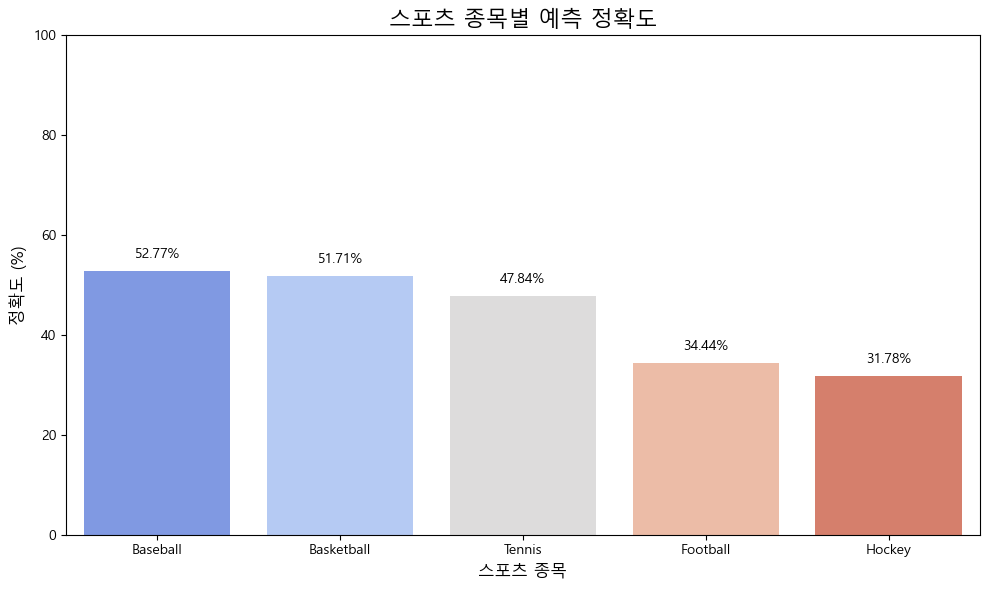

In [16]:
# 스포츠 종목별 정확도를 저장할 딕셔너리 초기화
sport_accuracy = {}

# 'Sport' 컬럼의 고유한 값(즉, 각 스포츠 종목)들을 가져옵니다.
unique_sports = df['Sport'].unique()

print("스포츠 종목별 예측 정확도:")
print("-" * 30)

# 각 스포츠 종목에 대해 반복합니다.
for sport in unique_sports:
    # 현재 스포츠 종목에 해당하는 데이터만 필터링합니다.
    df_sport = df[df['Sport'] == sport]

    # 해당 스포츠 종목 내에서 'Predicted_Winner'와 'Actual_Winner'가 일치하는 비율을 계산합니다.
    # (df_sport['Predicted_Winner'] == df_sport['Actual_Winner'])는 True/False 시리즈를 반환하고,
    # .mean()은 True(1)의 비율을 계산하여 정확도를 얻습니다.
    accuracy = (df_sport['Predicted_Winner'] == df_sport['Actual_Winner']).mean() * 100

    # 결과를 딕셔너리에 저장하고 출력합니다.
    sport_accuracy[sport] = accuracy
    print(f"{sport}: {accuracy:.2f}%")

print("-" * 30)

# (옵션) 스포츠 종목별 정확도를 시각화하여 비교하기 쉽게 할 수도 있습니다.
# 위에서 구한 sport_accuracy 딕셔너리를 Pandas Series로 변환
sport_accuracy_series = pd.Series(sport_accuracy).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sport_accuracy_series.index, y=sport_accuracy_series.values, palette='coolwarm')
plt.title('스포츠 종목별 예측 정확도', fontsize=16)
plt.xlabel('스포츠 종목', fontsize=12)
plt.ylabel('정확도 (%)', fontsize=12)
plt.ylim(0, 100) # 정확도는 0에서 100 사이이므로 y축 범위 설정

# 각 막대 위에 정확도 값 표시
for index, value in enumerate(sport_accuracy_series.values):
    plt.text(index, value + 2, f"{value:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- Football과 Hockey에서만 무승부 존재 -> 예측 정확도가 떨어지는 원인일지도

#### 결측치 분석

In [17]:
# 'Home_Team_Odds' 컬럼에서 NaN 값의 개수를 계산합니다.
nan_count = df['Home_Team_Odds'].isna().sum()

print(f"Home_Team_Odds 컬럼에 NaN 값이 있는 행의 수: {nan_count}개\n")

# 'Home_Team_Odds' 컬럼이 NaN인 행들만 필터링하여 새로운 데이터프레임을 생성합니다.
Home_Team_Odds_NaN = df[df['Home_Team_Odds'].isna()].copy()

print("Home_Team_Odds_NaN 데이터프레임의 상위 5개 행:")
print(Home_Team_Odds_NaN.head())

# (옵션) 새로운 데이터프레임의 정보 확인
# print("\nHome_Team_Odds_NaN 데이터프레임 정보:")
# Home_Team_Odds_NaN.info()

Home_Team_Odds 컬럼에 NaN 값이 있는 행의 수: 71개

Home_Team_Odds_NaN 데이터프레임의 상위 5개 행:
   Match_ID        Date       Sport                 Home_Team  \
45   M00046  2024-07-18      Hockey  North Autumnville Eagles   
55   M00056  2025-07-05  Basketball          Cooperview Bears   
59   M00060  2024-01-25    Baseball         Port Cheryl Lions   
67   M00068  2023-08-27      Tennis        Chelseaview Eagles   
70   M00071  2025-02-19    Baseball           Martinton Lions   

                 Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
45        Scottshire Bears             NaN            2.30       4.69   
55         Davisfurt Lions             NaN            4.66        NaN   
59      Schwartzfort Bears             NaN            2.56        NaN   
67    Michellemouth Tigers             NaN             NaN        NaN   
70  Port Deannastad Eagles             NaN            2.35        NaN   

          Predicted_Winner         Actual_Winner  
45        Scottshire Bears                 

In [19]:
# 'Away_Team_Odds' 컬럼에서 NaN 값의 개수를 계산합니다.
nan_count = df['Away_Team_Odds'].isna().sum()

print(f"Away_Team_Odds 컬럼에 NaN 값이 있는 행의 수: {nan_count}개\n")

# 'Away_Team_Odds' 컬럼이 NaN인 행들만 필터링하여 새로운 데이터프레임을 생성합니다.
Away_Team_Odds_NaN = df[df['Away_Team_Odds'].isna()].copy()

print("Away_Team_Odds_NaN 데이터프레임의 상위 5개 행:")
print(Away_Team_Odds_NaN.head())

# (옵션) 새로운 데이터프레임의 정보 확인
# print("\nAway_Team_Odds_NaN 데이터프레임 정보:")
# Away_Team_Odds_NaN.info()

Away_Team_Odds 컬럼에 NaN 값이 있는 행의 수: 87개

Away_Team_Odds_NaN 데이터프레임의 상위 5개 행:
   Match_ID        Date       Sport             Home_Team  \
1    M00002  2025-05-03  Basketball       Rothstad Wolves   
19   M00020  2024-03-19    Baseball    Cameronberg Wolves   
67   M00068  2023-08-27      Tennis    Chelseaview Eagles   
74   M00075  2023-08-19    Baseball        Choiport Lions   
96   M00097  2024-01-10  Basketball  Valenciamouth Eagles   

                    Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
1         North Manuel Eagles            1.84             NaN        NaN   
19          Paulamouth Eagles            4.81             NaN        NaN   
67       Michellemouth Tigers             NaN             NaN        NaN   
74         North Andrew Bears            4.77             NaN        NaN   
96  East Williamborough Bears            2.09             NaN        NaN   

        Predicted_Winner              Actual_Winner  
1        Rothstad Wolves            Rothstad W

In [21]:
# Filter the DataFrame for 'Football' and 'Hockey' sports
df_football_hockey = df[df['Sport'].isin(['Football', 'Hockey'])]

# Count NaN values in 'Draw_Odds' for the filtered DataFrame
draw_odds_nan_count = df_football_hockey['Draw_Odds'].isna().sum()

print(f"Football and Hockey 종목에서 Draw_Odds 컬럼에 NaN 값이 있는 행의 수: {draw_odds_nan_count}개\n")

# Create a new DataFrame with rows where 'Sport' is Football or Hockey AND 'Draw_Odds' is NaN
Draw_Odds_NaN = df_football_hockey[df_football_hockey['Draw_Odds'].isna()].copy()

print("Draw_Odds_NaN 데이터프레임의 상위 5개 행:")
print(Draw_Odds_NaN.head())

# (Optional) Print the shape of the new DataFrame to confirm the number of rows and columns
# print(f"\nDraw_Odds_NaN 데이터프레임의 형태: {Draw_Odds_NaN.shape}")

# (Optional) Check the 'Sport' values in the new DataFrame to confirm the filter
# print("\nDraw_Odds_NaN 데이터프레임의 Sport 컬럼 고유값:")
# print(Draw_Odds_NaN['Sport'].unique())

# (Optional) Check for NaN values in 'Draw_Odds' within the new DataFrame
# print("\nDraw_Odds_NaN 데이터프레임의 Draw_Odds NaN 값 확인:")
# print(Draw_Odds_NaN['Draw_Odds'].isna().sum())

Football and Hockey 종목에서 Draw_Odds 컬럼에 NaN 값이 있는 행의 수: 30개

Draw_Odds_NaN 데이터프레임의 상위 5개 행:
    Match_ID        Date     Sport          Home_Team  \
20    M00021  2024-09-16  Football  Camposville Bears   
165   M00166  2024-07-06    Hockey   Port Lisa Wolves   
178   M00179  2023-08-08    Hockey  Michaelland Bears   
191   M00192  2024-03-13  Football   Karenburgh Bears   
261   M00262  2025-07-07  Football  South John Tigers   

                      Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
20   Lake Kimberlychester Lions            3.40            1.52        NaN   
165            New Brett Tigers             NaN            4.15        NaN   
178          Port Debbie Tigers            4.18            2.43        NaN   
191   South Robertchester Lions            1.21             NaN        NaN   
261            Rosemouth Wolves            1.53            2.73        NaN   

              Predicted_Winner               Actual_Winner  
20           Camposville Bears  Lake

In [23]:
# 'Predicted_Winner'가 'Draw'이거나 'Actual_Winner'가 'Draw'인 행들을 필터링합니다.
draw_matches = df[(df['Predicted_Winner'] == 'Draw') | (df['Actual_Winner'] == 'Draw')].copy()

print("Predicted_Winner 또는 Actual_Winner가 'Draw'인 경기들:")
print(draw_matches.head())

# (옵션) 필터링된 데이터프레임의 크기 확인
print(f"\n'Draw' 결과가 포함된 총 경기 수: {len(draw_matches)}개")

# (옵션) 'Draw' 결과가 포함된 경기들의 Sport 분포 확인
print("\n'Draw' 결과가 포함된 경기들의 스포츠 종목별 분포:")
print(draw_matches['Sport'].value_counts())

Predicted_Winner 또는 Actual_Winner가 'Draw'인 경기들:
   Match_ID        Date     Sport          Home_Team           Away_Team  \
11   M00012  2024-11-03    Hockey  Brownmouth Tigers   Smithmouth Wolves   
17   M00018  2024-03-23  Football   Lake Corey Bears  Lorettaland Wolves   
18   M00019  2025-04-07  Football  Port Sharon Lions   Torresland Tigers   
22   M00023  2024-04-10  Football    Kevinland Lions   South Adam Wolves   
24   M00025  2024-04-30  Football   Terryhaven Lions      New Lisa Lions   

    Home_Team_Odds  Away_Team_Odds  Draw_Odds  Predicted_Winner  \
11            4.79            2.43       4.12              Draw   
17            1.40            2.25       4.28  Lake Corey Bears   
18            3.57            1.50       1.62              Draw   
22            4.83            1.61       4.27              Draw   
24            4.51            4.07       3.03              Draw   

        Actual_Winner  
11  Brownmouth Tigers  
17               Draw  
18               Dra